In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('AirPassengers.csv',index_col='Month',parse_dates=True)

In [7]:
df.index.freq = 'MS'

In [8]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [52]:
df.describe()

,Passengers,forecast
count,144.000000,143.000000
mean,280.298611,2.237762
std,119.966317,33.754282
min,104.000000,-101.000000
25%,180.000000,-16.000000
50%,265.500000,4.000000
75%,360.500000,22.500000
max,622.000000,87.000000


In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
from pandas.plotting import lag_plot

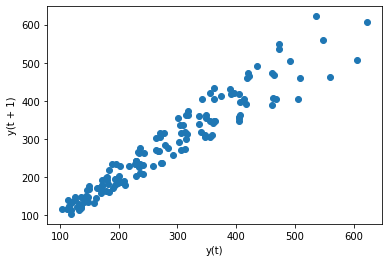

In [12]:
lag_plot(df['Passengers'])

##we can see here the autocorrelation between the values

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

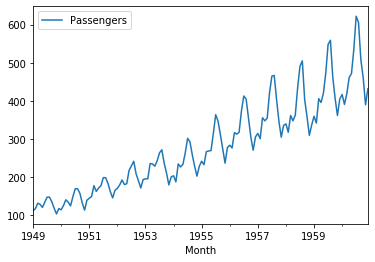

In [16]:
df.plot()

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
adfuller(df['Passengers'])

(0.8153688792060433,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [22]:
dftest = adfuller(df['Passengers'])

In [24]:
dfout = pd.Series(dftest[0:4],index=['ADF Test Statistics','P value','#Lags Used','#No.of observations'])

In [29]:
for key,val in dftest[4].items():
    dfout[f'critical value({key})'] = val

In [30]:
dfout

ADF Test Statistics      0.815369
P value                  0.991880
#Lags Used              13.000000
#No.of observations    130.000000
critical value(1%)      -3.481682
critical value(5%)      -2.884042
critical value(10%)     -2.578770
dtype: float64

# Series is non stationary

Series is not stationary so we apply differencing

In [31]:
from statsmodels.tsa.statespace.tools import diff

In [32]:
df['forecast'] = df['Passengers'] - df['Passengers'].shift(1)

In [33]:
df.head()

,Passengers,forecast
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


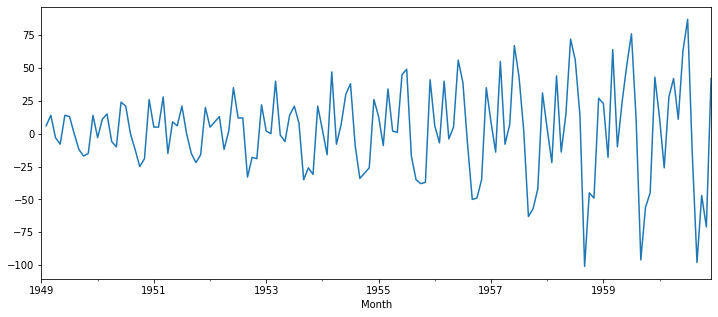

In [35]:
df['forecast'].plot(figsize=(12,5))

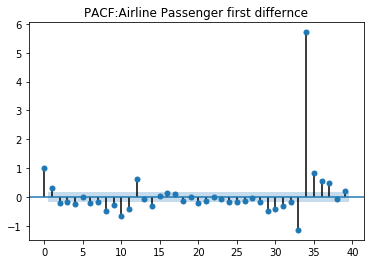

In [43]:
title = 'PACF:Airline Passenger first differnce'
lags=40
plot_pacf(df['forecast'].dropna(),title=title,lags=np.arange(lags));  # be sure to add .dropna() here!

In [44]:
df.head()

,Passengers,forecast
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [41]:
from pmdarima import auto_arima

In [46]:
auto_arima(df['Passengers'])

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [47]:
auto_arima(df['Passengers']).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -666.022
Date:                Tue, 14 Apr 2020   AIC                           1344.044
Time:                        20:33:54   BIC                           1361.821
Sample:                             0   HQIC                          1351.268
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6620      0.193      3.425      0.001       0.283       1.041
ar.L1          1.6479      0.028     58.886      0.000       1.593       1.703
ar.L2         -0.9096      0.025    -36.752      0.000      -0.958      -0.861
ma.L1         -1.9079      0.357     -5.350      0.000      -2.607      -1.209
ma.L2          0.9977      0.372      2.679      0.007       0.268       1.728
sigma2       611.8288    247.834      2.469      0.014     126.084    1097.574
===================================================================================
Ljung-Box (Q):                      358.20   Jarque-Bera (JB):                 2.78
Prob(Q):                              0.00   Prob(JB):                         0.25
Heteroskedasticity (H):               7.02   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Auto arima on seasonal data i.e Airpassengers

In [51]:
stepwise_fit = auto_arima(df['Passengers'], start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=1024.824, BIC=1039.200, Time=0.560 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=1033.479, BIC=1039.229, Time=0.022 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=1022.316, BIC=1033.817, Time=0.409 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=1022.904, BIC=1034.405, Time=0.513 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=1031.508, BIC=1034.383, Time=0.021 seconds
Fit ARIMA: (1, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=1022.343, BIC=1030.968, Time=0.127 seconds
Fit ARIMA: (1, 1, 0)x(2, 1, 0, 12) (constant=True); AIC=1021.137, BIC=1035.513, Time=1.260 seconds
Fit ARIMA: (1, 1, 0)x(2, 1, 1, 12) (constant=True); AIC=1017.164, BIC=1034.415, Time=4.576 seconds
Near non-invertible roots for order (1, 1, 0)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.921
Date:                            Tue, 14 Apr 2020   AIC                           1015.841
Time:                                    20:37:14   BIC                           1033.092
Sample:                                         0   HQIC                          1022.851
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.033      0.007      0.994      -0.064       0.065
ma.L1         -0.4261      0.068     -6.255      0.000      -0.560      -0.293
ar.S.L12       0.6722      0.162      4.155      0.000       0.355       0.989
ar.S.L24       0.3268      0.094      3.481      0.000       0.143       0.511
ma.S.L12      -0.9788      1.478     -0.662      0.508      -3.876       1.918
sigma2       110.3866    139.923      0.789      0.430    -163.858     384.631
===================================================================================
Ljung-Box (Q):                       52.79   Jarque-Bera (JB):                 7.34
Prob(Q):                              0.08   Prob(JB):                         0.03
Heteroskedasticity (H):               2.81   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
# Set one month for testing
train = df.iloc[:121]
test = df.iloc[121:]

In [54]:
from statsmodels.tsa.arima_model import ARIMA

In [55]:
model = ARIMA(df['Passengers'],order=(1,1,1))

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -697.073
Method:                       css-mle   S.D. of innovations             31.338
Date:                Tue, 14 Apr 2020   AIC                           1402.145
Time:                        20:41:26   BIC                           1413.997
Sample:                    02-01-1949   HQIC                          1406.961
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.6112      0.228     11.435      0.000       2.164       3.059
ar.L1.D.Passengers     0.7400      0.058     12.778      0.000       0.626       0.854
ma.L1.D.Passengers    -1.0000      0.019    -53.425      0.000      -1.037      -0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3513           +0.0000j            1.3513            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [57]:
start=len(train)
end=len(train)+len(test)-1
predictions = result.predict(start=start, end=end).rename('ARIMA(1,1,) Predictions')

In [60]:
predictions

Month
1959-02-01    13.799833
1959-03-01    18.909682
1959-04-01     3.299012
1959-05-01     6.475361
1959-06-01     1.048373
1959-07-01   -11.405782
1959-08-01   -29.828104
1959-09-01   -31.703806
1959-10-01    -6.542347
1959-11-01     8.332020
1959-12-01    20.320719
1960-01-01     9.984367
1960-02-01     7.557811
1960-03-01    14.756462
1960-04-01     8.249518
1960-05-01    -1.753349
1960-06-01    -3.845063
1960-07-01   -19.080911
1960-08-01   -40.288786
1960-09-01   -35.283187
1960-10-01    -9.551913
1960-11-01     3.093391
1960-12-01    21.733928
Freq: MS, Name: ARIMA(1,1,) Predictions, dtype: float64